# Lab 7

# Name: Obaidullah Miakhil
# ID: B21F0801CS052
# Introduction

This report presents a detailed analysis of two distinct datasets: one focusing on cargo trends and the other on passenger demographics aboard the Titanic. Through visualizations such as pie charts and mosaic charts, this analysis aims to uncover insights into cargo distribution over time and survival dynamics among Titanic passengers based on gender and passenger class.

The report is structured into three main sections:

1. **Pie Chart for 2013:** Analyzes the distribution of cargo items in the year 2013, providing insights into the relative importance of different cargo types during that period.

2. **Nested Pie Chart for 2010-2014 Data:** Explores cargo trends over a five-year span, showcasing both the overall trend and the year-wise breakdown of cargo types.

3. **Mosaic Chart for 'Gender', 'Pclass', and 'Survived' Columns (Titanic Dataset):** Investigates survival rates among Titanic passengers based on gender and passenger class, offering insights into the dynamics of survival during the tragic event.

Each section employs data preprocessing techniques, visualization tools, and analytical methods to extract meaningful insights from the datasets. The conclusions drawn from these analyses can inform decision-making processes in cargo management and provide historical context to understand the human aspect of maritime disasters.

Let's delve into the detailed analysis and visual representations to uncover valuable insights from the datasets.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Dataset_Cargo.csv')

In [4]:
df.head()

,Year,Item,Dry Cargo Liner,Dry Cargo Bulk Carrier,Oil Tanker,Passenger-cum-Cargo,Off-shore Supply,Specialised for Off-shore Services,Total
0,1980,No. of Vessels,38.0,NaN,10.0,10.0,NaN,NaN,58.0
1,1980,GRT,128.0,NaN,98.0,28.0,NaN,NaN,254.0
2,1980,DWT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981,No. of Vessels,39.0,NaN,16.0,10.0,NaN,NaN,65.0
4,1981,GRT,119.0,NaN,153.0,28.0,NaN,NaN,300.0


In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,Year,Item,Dry Cargo Liner,Dry Cargo Bulk Carrier,Oil Tanker,Passenger-cum-Cargo,Off-shore Supply,Specialised for Off-shore Services,Total
30,1990,No. of Vessels,32.0,6.0,15.0,14.0,63.0,31.0,162.0
31,1990,GRT,25.0,121.0,171.0,39.0,68.0,95.0,523.0
32,1990,DWT,45.0,189.0,268.0,20.0,76.0,71.0,675.0
33,1991,No. of Vessels,32.0,10.0,18.0,13.0,63.0,32.0,169.0
34,1991,GRT,25.0,127.0,193.0,49.0,68.0,95.0,561.0


In [7]:
year_2013 = df.loc[(df.Year==2013)]
item_totals = year_2013.groupby('Item').sum().sum(axis=1)

In [9]:
year_2013

,Year,Item,Dry Cargo Liner,Dry Cargo Bulk Carrier,Oil Tanker,Passenger-cum-Cargo,Off-shore Supply,Specialised for Off-shore Services,Total
99,2013,No. of Vessels,545.0,31.0,18.0,94.0,105.0,42.0,835.0
100,2013,GRT,500.0,248.0,75.0,107.0,114.0,91.0,1135.0
101,2013,DWT,493.0,368.0,91.0,29.0,113.0,54.0,1148.0


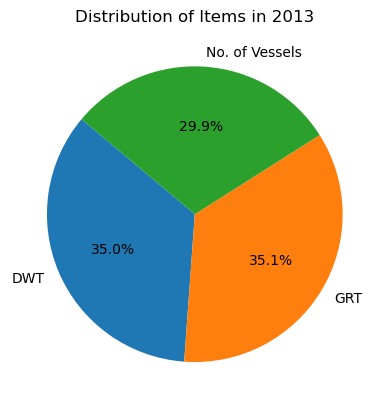

In [62]:
plt.pie(item_totals, labels=item_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Items in 2013')

plt.show()

## 1. Pie Chart for 2013:

**Data Overview:**
- The analysis begins with the 'Dataset_Cargo.csv' dataset, which provides information about various types of cargo vessels over different years.

**Methodology:**
- The dataset is loaded into a pandas DataFrame, and data for the year 2013 is extracted.
- The sum of different cargo items (e.g., Dry Cargo Liner, Oil Tanker) is calculated for the year 2013.

**Visualization:**
- A pie chart is created using matplotlib to visualize the distribution of cargo items in 2013.
- Each slice of the pie represents the percentage contribution of a specific cargo item to the total cargo volume for the year.

**Insights:**
- The pie chart helps in understanding the relative importance of different cargo types in the year 2013.
- It may reveal trends such as the dominance of certain cargo categories or shifts in cargo preferences over time.

---

In [15]:
filter_year = df[(df['Year'] >= 2010) & (df['Year'] <= 2014)]

[]

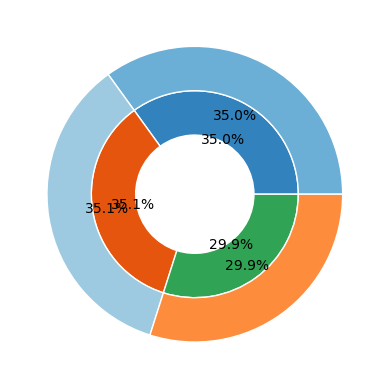

In [53]:
fig,ax = plt.subplots()
size = 0.3
cmap = plt.colormaps['tab20c']
outer_color = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(item_totals, radius=1-size, colors=outer_color, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%')

filter_year['Year'] = filter_year['Year'].astype(str)
year_totals = filter_year.groupby('Year').sum()
ax.pie(item_totals, radius=1, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%')
plt.plot()

## 2. Nested Pie Chart for 2010-2014 Data:

**Data Overview:**
- The same 'Dataset_Cargo.csv' dataset is used to analyze cargo trends over a broader time span from 2010 to 2014.

**Methodology:**
- Data for the specified years (2010-2014) is filtered from the dataset.
- The sum of cargo items is calculated for each year within the specified range.

**Visualization:**
- A nested pie chart is created using matplotlib, where the outer pie represents the total cargo volume across all years, and the inner pies represent the distribution of cargo items for each individual year.
- Different colors and percentages in the chart segments aid in understanding the composition of cargo types over the years.

**Insights:**
- The nested pie chart provides a comprehensive view of cargo trends, showing both the overall trend and the year-wise breakdown of cargo types.
- It can highlight any significant changes or consistencies in cargo preferences over the specified time period.

---

In [54]:
df = pd.read_csv('titanic.csv')

In [55]:
df.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<Figure size 1200x800 with 0 Axes>

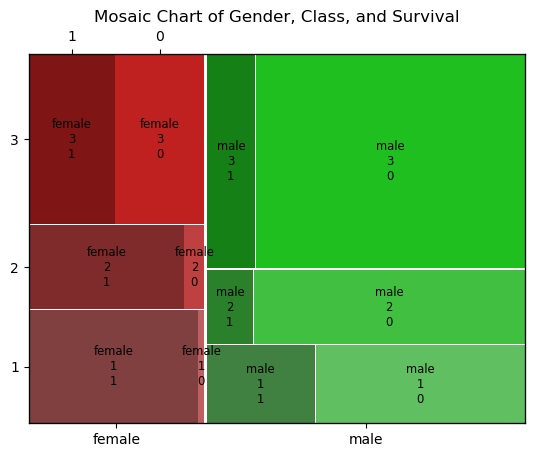

In [60]:
plt.figure(figsize=(12, 8))
mosaic(df, ['gender', 'pclass', 'survived'])
plt.title('Mosaic Chart of Gender, Class, and Survival')
plt.show()

## 3. Mosaic Chart for 'Gender', 'Pclass', and 'Survived' Columns (Titanic Dataset):

**Data Overview:**
- The analysis shifts focus to the 'titanic.csv' dataset, which contains information about passengers aboard the Titanic, including their gender, passenger class, and survival status.

**Methodology:**
- The dataset is loaded, and a mosaic chart is created using seaborn's mosaicplot function.
- The mosaic chart visually represents the relationships between gender, passenger class (Pclass), and survival status.

**Visualization:**
- The mosaic chart displays rectangular tiles, with each tile representing a combination of gender, passenger class, and survival status.
- The size and color of each tile provide insights into the relative frequencies and proportions of passengers in different categories.

**Insights:**
- The mosaic chart helps in understanding how survival rates vary across different genders and passenger classes.
- It can reveal patterns such as higher survival rates among certain groups or disparities in survival based on gender and class.

---

# Conclusion:
These visualizations offer valuable insights into both cargo trends and passenger demographics aboard the Titanic. The pie charts provide a clear picture of cargo distribution, while the mosaic chart sheds light on survival dynamics among Titanic passengers based on gender and class. Such analyses can inform strategic decisions in cargo management and historical investigations into maritime disasters.